In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [3]:
!pip install plotly

In [4]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

In [5]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ["TF_DETERMINISTIC_OPS"] = "0"

In [6]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [7]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [8]:
train_data = train_df('D:\Mahir\Datasets\Merged Dataset 2\Training')

In [9]:
train_data


,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
...,...,...
16983,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16984,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16985,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16986,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary


In [10]:
test_data = test_df('D:\Mahir\Datasets\Merged Dataset 2\Testing')

In [11]:
test_data

,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
...,...,...
4322,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4323,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4324,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4325,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary


In [12]:
train_path = 'D:\Mahir\Datasets\Merged Dataset 2\Training'
test_path = 'D:\Mahir\Datasets\Merged Dataset 2\Testing'

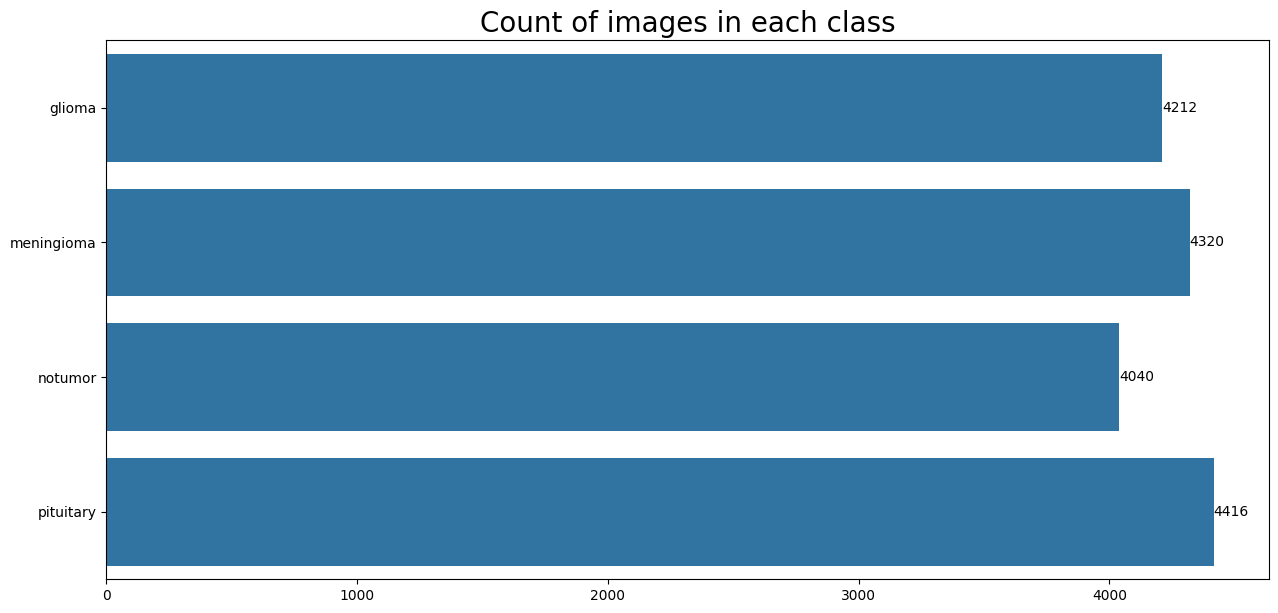

In [13]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_data , y=train_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

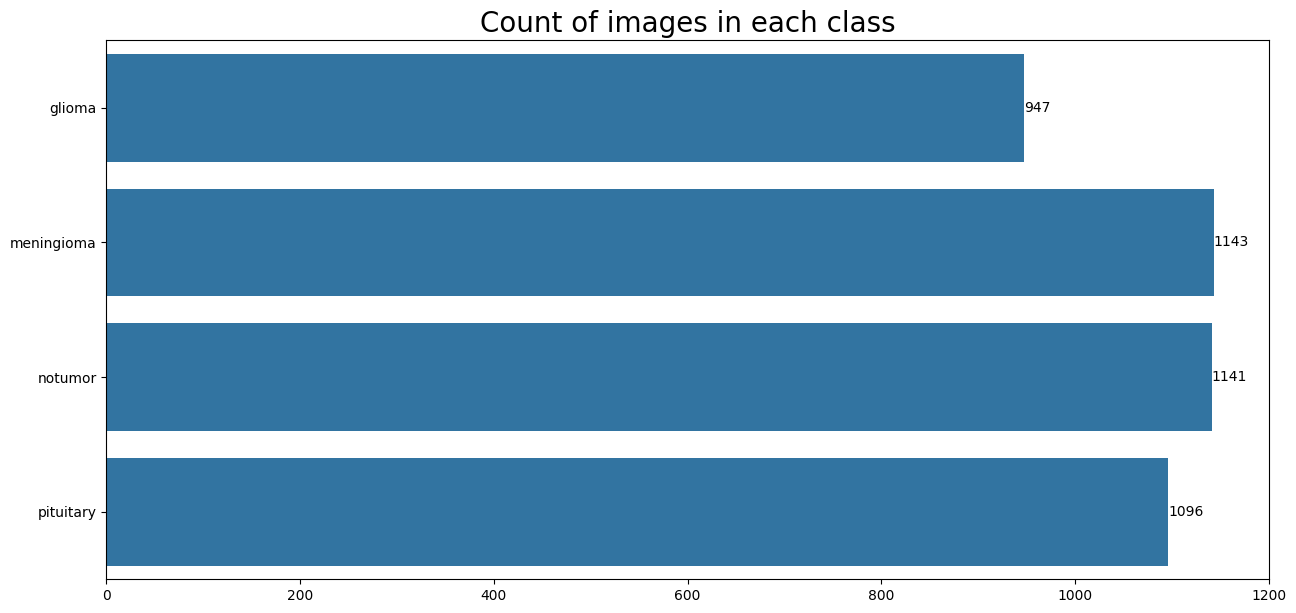

In [14]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_data , y=test_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


In [15]:
# Image size
image_size = (160, 160)

# Training batch size
batch_size = 32

In [16]:
# Data preprocessing without any augmentation, only rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(160, 160),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    seed=0)

# Creating validation data generator
val_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation',
                                                 shuffle=False,
                                                  seed=0)

# Applying the generator to testing data, only rescaling
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='training',  # Uses the other 50% intended for testing
                                                  shuffle=False)

Found 16988 images belonging to 4 classes.
Found 2162 images belonging to 4 classes.
Found 2165 images belonging to 4 classes.


In [17]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """

    # Generate augmented samples
    # Use __next__() instead of next()
    augmented_samples = train_generator.__next__()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()

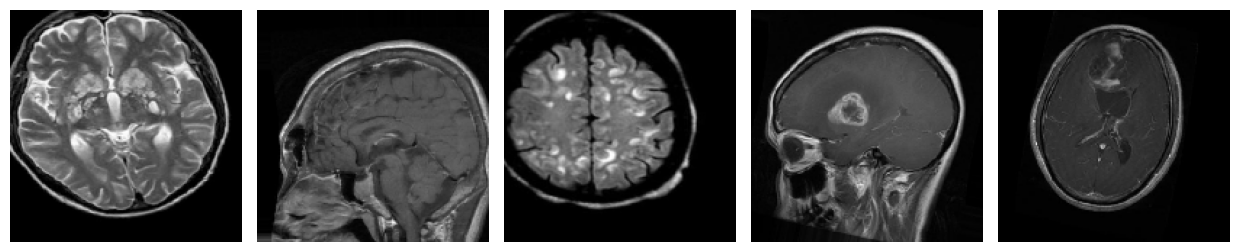

In [18]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)


In [19]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (160, 160, 3)
Batch size: 32
Number of Train batches: 531
Number of Validation batches: 68
Number of Testing batches: 68


In [20]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [21]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [22]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

# Xception

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

img_shape=(160,160,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

teacher_model_1 = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

# Call the model with a sample input to define the output shapes
sample_input = tf.keras.Input(shape=img_shape)  # Create a sample input tensor
_ = teacher_model_1(sample_input)  # Call the model to infer shapes

teacher_model_1.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

teacher_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,124,268
Trainable params: 21,069,740
No

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_epochs = 50

early_stopper = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

checkpoint_path = r'D:\Mahir\Brain\xception\chk\xception_no_aug_d2_epoch_50_p_7_lr_1e3.keras'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

# vgg_history = model_vgg.fit(
#     train_generator,
#     epochs=num_epochs,
#     validation_data=val_generator,
#     callbacks=[early_stopper, model_checkpoint]
# )

teacher_model_1.load_weights(checkpoint_path)

teacher_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,124,268
Trainable params: 21,069,740
No

In [25]:
# train_score = teacher.evaluate(train_generator, verbose=1)
# valid_score = teacher.evaluate(val_generator, verbose=1)
test_score = teacher_model_1.evaluate(test_generator, verbose=1)

# print(f"Train Loss: {train_score[0]:.4f}")
# print(f"Train Accuracy: {train_score[1]*100:.2f}%")
# print('-' * 20)
# print(f"Validation Loss: {valid_score[0]:.4f}")
# print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
# print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


68/68 [==============================] - 17s 178ms/step - loss: 0.1663 - accuracy: 0.9732 - precision: 0.9750 - recall: 0.9732
Test Loss: 0.1663
Test Accuracy: 97.32%


In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(160, 160, 3))


for layer in base_model_vgg.layers[:-10]:
    layer.trainable = False

for layer in base_model_vgg.layers[-10:]:
    layer.trainable = True

# Add custom classification head
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

teacher_model_2 = Model(inputs=base_model_vgg.input, outputs=output)


teacher_model_2.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

teacher_model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_epochs = 50

early_stopper = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

checkpoint_path = r'D:\Mahir\Brain\Checkpoints\vgg16_no_aug_d2_epoch50_p_7.keras'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

# vgg_history = model_vgg.fit(
#     train_generator,
#     epochs=num_epochs,
#     validation_data=val_generator,
#     callbacks=[early_stopper, model_checkpoint]
# )

teacher_model_2.load_weights(checkpoint_path)

teacher_model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [28]:
# train_score = teacher.evaluate(train_generator, verbose=1)
# valid_score = teacher.evaluate(val_generator, verbose=1)
test_score = teacher_model_2.evaluate(test_generator, verbose=1)

# print(f"Train Loss: {train_score[0]:.4f}")
# print(f"Train Accuracy: {train_score[1]*100:.2f}%")
# print('-' * 20)
# print(f"Validation Loss: {valid_score[0]:.4f}")
# print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
# print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


68/68 [==============================] - 9s 86ms/step - loss: 0.1422 - accuracy: 0.9727 - precision_1: 0.9745 - recall_1: 0.9714
Test Loss: 0.1422
Test Accuracy: 97.27%


### Resnet Student

In [29]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

def dense_block(x, num_layers, growth_rate, drop_rate=0.0):
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate, drop_rate=drop_rate)
    return x

def dense_layer(x, growth_rate, bottleneck_width=2, drop_rate=0.3):
    bn1 = layers.BatchNormalization()(x)
    relu1 = layers.ReLU()(bn1)
    conv1 = layers.Conv2D(
        bottleneck_width * growth_rate, 
        (1, 1), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu1)
    bn2 = layers.BatchNormalization()(conv1)
    relu2 = layers.ReLU()(bn2)
    conv2 = layers.Conv2D(
        growth_rate, 
        (3, 3), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu2)
    if drop_rate > 0.0:
        conv2 = layers.Dropout(drop_rate)(conv2)
    return layers.Concatenate()([x, conv2])

def transition_layer(x, reduction):
    bn = layers.BatchNormalization()(x)
    relu = layers.ReLU()(bn)
    num_filters = int(x.shape[-1] * reduction)
    conv = layers.Conv2D(
        num_filters, 
        (1, 1), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu)
    return layers.AveragePooling2D((2, 2), strides=2)(conv)

def DenseNetMobile(input_shape=(160, 160, 3), num_classes=4, growth_rate=12, num_blocks=3, 
                   num_layers_per_block=[4, 8, 6], reduction=0.5, drop_rate=0.3):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(
        16, 
        (7, 7), 
        strides=2, 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    for i in range(num_blocks):
        x = dense_block(x, num_layers_per_block[i], growth_rate, drop_rate=drop_rate)
        if i != num_blocks - 1:
            x = transition_layer(x, reduction)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)  # Dropout before classification
    outputs = layers.Dense(
        num_classes, 
        activation='softmax', 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(x)
    return Model(inputs, outputs)


student_model = DenseNetMobile()

student_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

student_model.summary()
# your code goes here

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 80, 80, 16)   2352        ['input_4[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 80, 80, 16)  64          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                            

In [30]:
def distillation_loss_multi_teacher(y_true, y_pred, teacher_preds, temperature=5.0, alpha=0.5):
    """
    Computes the distillation loss: a combination of student loss and averaged teacher distillation loss.

    Args:
        y_true: Ground truth labels (one-hot encoded).
        y_pred: Student model predictions (logits).
        teacher_preds: List of teacher model predictions (logits).
        temperature: Temperature for softening probability distributions.
        alpha: Weight factor for student loss vs. distillation loss.

    Returns:
        Combined loss value.
    """
    # Average the logits from all teacher models
    avg_teacher_pred = tf.reduce_mean(teacher_preds, axis=0)

    # Student loss (hard labels)
    student_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

    # Distillation loss (softened predictions)
    teacher_soft = tf.nn.softmax(avg_teacher_pred / temperature)
    student_soft = tf.nn.softmax(y_pred / temperature)
    distill_loss = tf.keras.losses.categorical_crossentropy(teacher_soft, student_soft) * temperature**2

    # Combined loss
    return alpha * student_loss + (1 - alpha) * distill_loss


In [31]:
import math
import tensorflow as tf

def train_and_evaluate_multi_teacher(student_model, teacher_models, train_generator, val_generator, test_generator,
                                      epochs=10, temperature=5.0, alpha=0.5, patience=5, save_path="best_model.h5"):
    """
    Train the student model with multiple teacher models, evaluate on test set, and include detailed metrics.

    Args:
        student_model: The student model to be trained.
        teacher_models: List of pre-trained, frozen teacher models.
        train_generator: Training data generator.
        val_generator: Validation data generator.
        test_generator: Test data generator for evaluation.
        epochs: Maximum number of epochs.
        temperature: Temperature parameter for softening probabilities.
        alpha: Weight for the student loss.
        patience: Number of epochs to wait for improvement before stopping.
        save_path: Path to save the best model.
    """
    # Freeze all teacher models
    for teacher in teacher_models:
        for layer in teacher.layers:
            layer.trainable = False

    optimizer = tf.keras.optimizers.Adam()
    best_val_loss = float('inf')
    patience_counter = 0

    # Metrics storage
    train_losses, train_accuracies, train_precisions, train_recalls = [], [], [], []
    val_losses, val_accuracies, val_precisions, val_recalls = [], [], [], []

    # Get the total number of batches based on dataset size and batch size
    total_batches_train = math.ceil(train_generator.samples / train_generator.batch_size)
    total_batches_val = math.ceil(val_generator.samples / val_generator.batch_size)
    total_batches_test = math.ceil(test_generator.samples / test_generator.batch_size)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Training phase
        train_loss = tf.keras.metrics.Mean()
        train_accuracy = tf.keras.metrics.CategoricalAccuracy()
        train_precision = tf.keras.metrics.Precision()
        train_recall = tf.keras.metrics.Recall()

        for iteration, (x_batch_train, y_batch_train) in enumerate(train_generator):
            if iteration >= total_batches_train:  # Ensure loop doesn't exceed batches
                break

            progress = min((iteration + 1) / total_batches_train, 1.0)
            bar = '=' * int(progress * 30)
            print(f"Iteration {iteration + 1}/{total_batches_train} [{bar:<30}] {progress * 100:.2f}%", end='\r')

            with tf.GradientTape() as tape:
                student_logits = student_model(x_batch_train, training=True)
                teacher_logits = [teacher(x_batch_train, training=False) for teacher in teacher_models]
                loss = distillation_loss_multi_teacher(y_batch_train, student_logits, teacher_logits, temperature, alpha)

            grads = tape.gradient(loss, student_model.trainable_weights)
            optimizer.apply_gradients(zip(grads, student_model.trainable_weights))

            train_loss.update_state(loss)
            train_accuracy.update_state(y_batch_train, student_logits)
            train_precision.update_state(y_batch_train, student_logits)
            train_recall.update_state(y_batch_train, student_logits)

        print()  # Ensure a new line after progress bar

        # Validation phase
        val_loss = tf.keras.metrics.Mean()
        val_accuracy = tf.keras.metrics.CategoricalAccuracy()
        val_precision = tf.keras.metrics.Precision()
        val_recall = tf.keras.metrics.Recall()

        for iteration, (x_batch_val, y_batch_val) in enumerate(val_generator):
            if iteration >= total_batches_val:  # Ensure loop doesn't exceed batches
                break

            val_logits = student_model(x_batch_val, training=False)
            teacher_logits = [teacher(x_batch_val, training=False) for teacher in teacher_models]
            loss = distillation_loss_multi_teacher(y_batch_val, val_logits, teacher_logits, temperature, alpha)
            val_loss.update_state(loss)
            val_accuracy.update_state(y_batch_val, val_logits)
            val_precision.update_state(y_batch_val, val_logits)
            val_recall.update_state(y_batch_val, val_logits)

        # Log metrics
        train_losses.append(train_loss.result().numpy())
        train_accuracies.append(train_accuracy.result().numpy())
        train_precisions.append(train_precision.result().numpy())
        train_recalls.append(train_recall.result().numpy())

        val_losses.append(val_loss.result().numpy())
        val_accuracies.append(val_accuracy.result().numpy())
        val_precisions.append(val_precision.result().numpy())
        val_recalls.append(val_recall.result().numpy())

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs} "
              f"loss: {train_loss.result().numpy():.4f} "
              f"- accuracy: {train_accuracy.result().numpy():.4f} "
              f"- precision: {train_precision.result().numpy():.4f} "
              f"- recall: {train_recall.result().numpy():.4f} "
              f"- val_loss: {val_loss.result().numpy():.4f} "
              f"- val_accuracy: {val_accuracy.result().numpy():.4f} "
              f"- val_precision: {val_precision.result().numpy():.4f} "
              f"- val_recall: {val_recall.result().numpy():.4f}")

        # Save the model if validation loss improves
        current_val_loss = val_loss.result().numpy()
        if current_val_loss < best_val_loss:
            print(f"Validation loss improved from {best_val_loss:.4f} to {current_val_loss:.4f}. Saving model.")
            best_val_loss = current_val_loss
            patience_counter = 0
            student_model.save(save_path)
        else:
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}/{patience}")

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    # Load the best model
    best_model = tf.keras.models.load_model(save_path)

    # Test phase
    test_loss = tf.keras.metrics.Mean()
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    test_precision = tf.keras.metrics.Precision()
    test_recall = tf.keras.metrics.Recall()

    for iteration, (x_batch_test, y_batch_test) in enumerate(test_generator):
        if iteration >= total_batches_test:  # Ensure loop doesn't exceed batches
            break

        test_logits = best_model(x_batch_test, training=False)
        loss = tf.keras.losses.categorical_crossentropy(y_batch_test, test_logits)
        test_loss.update_state(loss)
        test_accuracy.update_state(y_batch_test, test_logits)
        test_precision.update_state(y_batch_test, test_logits)
        test_recall.update_state(y_batch_test, test_logits)

    print(f"\nTest Loss: {test_loss.result().numpy():.4f}, "
          f"Test Accuracy: {test_accuracy.result().numpy():.4f}, "
          f"Test Precision: {test_precision.result().numpy():.4f}, "
          f"Test Recall: {test_recall.result().numpy():.4f}")

    return {
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "train_precisions": train_precisions,
        "train_recalls": train_recalls,
        "val_losses": val_losses,
        "val_accuracies": val_accuracies,
        "val_precisions": val_precisions,
        "val_recalls": val_recalls,
        "test_loss": test_loss.result().numpy(),
        "test_accuracy": test_accuracy.result().numpy(),
        "test_precision": test_precision.result().numpy(),
        "test_recall": test_recall.result().numpy(),
        "best_model": best_model
    }


In [32]:
# Train and evaluate the student model with multiple teachers
results = train_and_evaluate_multi_teacher(
    student_model=student_model,
    teacher_models=[teacher_model_1, teacher_model_2],
    train_generator=train_generator,
    val_generator=val_generator,
    test_generator=test_generator,
    epochs=250,
    temperature=2.0,
    alpha=0.5,
    patience=10,
    save_path="densenet_multi_teacher.h5"
)



Epoch 1/250
Iteration 531/531 [==============================] 100.00%
Epoch 1/250 loss: 3.1332 - accuracy: 0.6845 - precision: 0.7492 - recall: 0.5938 - val_loss: 3.9912 - val_accuracy: 0.4283 - val_precision: 0.4475 - val_recall: 0.4061
Validation loss improved from inf to 3.9912. Saving model.

Epoch 2/250
Iteration 531/531 [==============================] 100.00%
Epoch 2/250 loss: 3.0052 - accuracy: 0.7971 - precision: 0.8250 - recall: 0.7589 - val_loss: 3.6455 - val_accuracy: 0.5560 - val_precision: 0.5621 - val_recall: 0.5481
Validation loss improved from 3.9912 to 3.6455. Saving model.

Epoch 3/250
Iteration 531/531 [==============================] 100.00%
Epoch 3/250 loss: 2.9460 - accuracy: 0.8465 - precision: 0.8667 - recall: 0.8223 - val_loss: 3.1647 - val_accuracy: 0.7169 - val_precision: 0.7236 - val_recall: 0.6961
Validation loss improved from 3.6455 to 3.1647. Saving model.

Epoch 4/250
Iteration 531/531 [==============================] 100.00%
Epoch 4/250 loss: 2.9069 

In [33]:
student_model.load_weights('densenet_multi_teacher.h5')

In [34]:
train_score = student_model.evaluate(train_generator, verbose=1)
valid_score = student_model.evaluate(val_generator, verbose=1)
test_score = student_model.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 9s 128ms/step - loss: 0.5500 - accuracy: 0.8716 - precision_2: 0.8836 - recall_2: 0.8624
Train Loss: 0.3778
Train Accuracy: 91.38%
--------------------
Validation Loss: 0.5180
Validation Accuracy: 87.00%
--------------------
Test Loss: 0.5500
Test Accuracy: 87.16%


In [35]:
preds = student_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

68/68 [==============================] - 10s 134ms/step


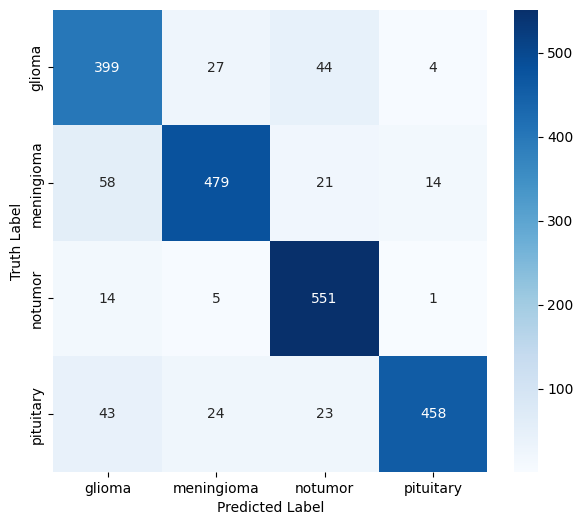

In [36]:
cm = confusion_matrix(test_generator.classes, y_pred)
class_dict = train_generator.class_indices
labels = list(class_dict.keys())
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [37]:
clr = classification_report(test_generator.classes, y_pred)
print(clr)


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       474
           1       0.90      0.84      0.87       572
           2       0.86      0.96      0.91       571
           3       0.96      0.84      0.89       548

    accuracy                           0.87      2165
   macro avg       0.87      0.87      0.87      2165
weighted avg       0.88      0.87      0.87      2165



In [38]:
!pip install pickle5


  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-310\pickle5
  creating build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-310\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with 

In [39]:
import pickle

# Create a copy of history excluding the model
history_without_model = {key: value for key, value in results.items() if key != 'best_model'}

# Save the dictionary
with open('densenet_multi_teacher.pkl', 'wb') as file:
    pickle.dump(history_without_model, file)




In [40]:
# Load the history dictionary
with open('densenet_multi_teacher.pkl', 'rb') as file:
    loaded_history = pickle.load(file)


In [41]:
loaded_history.keys()


dict_keys(['train_losses', 'train_accuracies', 'train_precisions', 'train_recalls', 'val_losses', 'val_accuracies', 'val_precisions', 'val_recalls', 'test_loss', 'test_accuracy', 'test_precision', 'test_recall'])

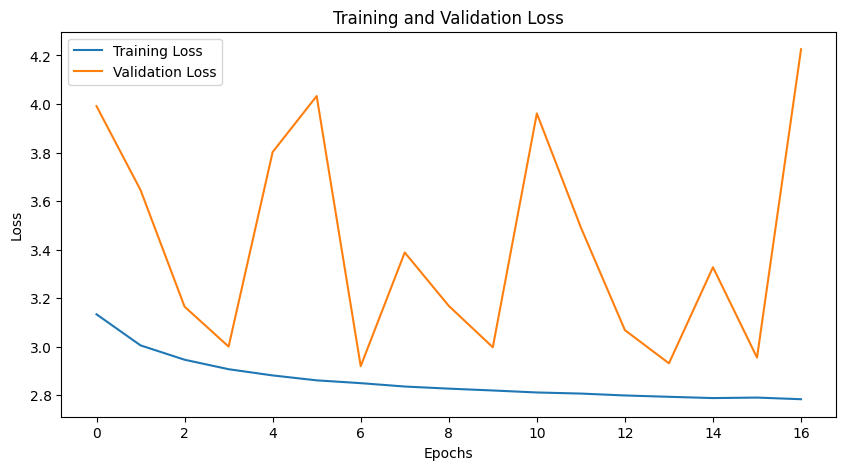

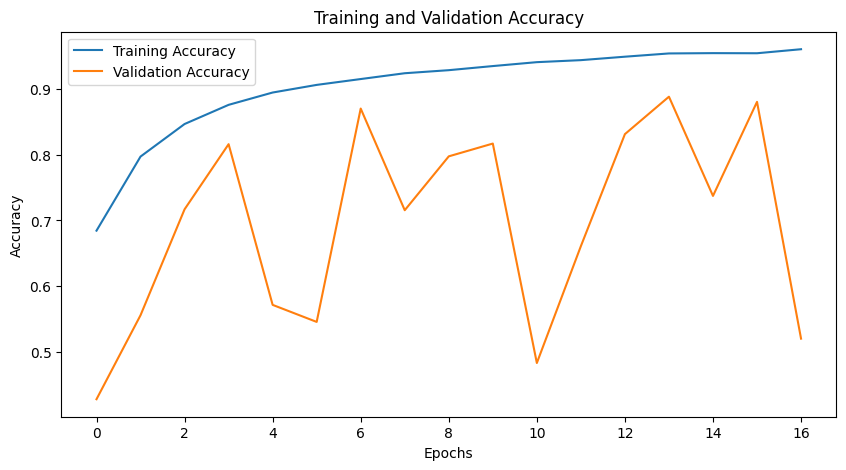

In [42]:
# Example: Plot training and validation losses
import matplotlib.pyplot as plt

# Extract losses and accuracies
train_losses = loaded_history['train_losses']
val_losses = loaded_history['val_losses']
train_accuracies = loaded_history['train_accuracies']
val_accuracies = loaded_history['val_accuracies']

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
